# Regresión logística y descenso del gradiente

Iker Aguirre Otaegui

13/11/2020

### Objetivo del trabajo.

El siguiente trabajo tiene como objeto estudiar, mediante su aplicación, el descenso del gradiente como método para minimizar la función de coste asociada a un modelo de regresión logística. Para ello, utilizaremos el dataset "4_1_data", el cual recoge información referente al resultado de una prueba (ya sea de admisión a la universidad, nota final de una asignatura, etc) en base al resultado de dos tests previos. 

Las variables que podemos encontrar en este dataset son:

- score-1: Nota del primer test.


- score-2: Nota del segundo test.


- label: Resultado de la prueba global, adoptando valor 1 en caso de resolverse a favor del alumno que realiza los tests, y adoptando valor 0 en caso contrario (admitido o no admitido, aprobado o no aprobado, etc)

###  Carga de librerías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Carga del dataset. 

In [2]:
data = pd.read_csv('4_1_data.csv')

### Análisis exploratorio previo.

In [3]:
list(data)

['score-1', 'score-2', 'label']

In [4]:
data.describe()

,score-1,score-2,label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score-1  100 non-null    float64
 1   score-2  100 non-null    float64
 2   label    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [6]:
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [7]:
test1 = data.iloc[:, 0]
test2 = data.iloc[:, 1].values
resultado = data.iloc[:, -1].values

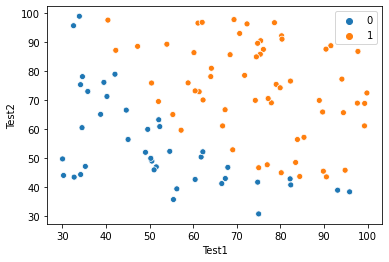

In [8]:
representacion_data = sns.scatterplot (x = test1, y = test2, hue = resultado)
representacion_data.set(xlabel="Test1", ylabel="Test2")
plt.show()

El gráfico representa las notas de cada uno de los alumnos, representando el eje de abcisas la nota del primer test y el eje de coordenadas la nota del segundo. El color de los puntos sirve para diferenciar quien ha pasado la prueba y quien no, asignando el color naranja a los que sí y el color azul a los que no.

## 1. Función logística.

Puesto que la variable dependiente se trate de una variable categórica, recurrimos a la regresión logística. Para ello, definimos una función logistica o sigmoide, cuyo valor se encontrará siempre entre 0 y 1:
$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

Dato que el objetivo es clasificar los datos por probabilidades de manera binaria, en un principio toda probabilidad por debajo de 0.5 computará como "0" y toda aquella que esté por encima de 0.5 corresponerá a la clase "1".


In [19]:
def funcion_logistica(x):    
    return 1/ (1 + np.exp(-x)) #fórmula de la función sigmoide

## 2. Función de coste y gradiente.

Esta función logística llevará asociada una función de coste, recopilando así el error que se comete al clasificar las observaciones de la muestra:
$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

Se procurará minimzar esta función de coste. Dado que nuestra función de coste es convexa, nos interesará el valor concreto del modelo que da lugar al mínimo global. Para ello, utilizamos el Descenso del Gradiente, mediante el cual iremos descendiendo por la curva hacia ese mínimo dando "saltos" de manera iterativa.

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [33]:
def costes_computados(theta, x, y):
    m = len(y) #número de observaciones
    y_prediccion = funcion_logistica(np.dot(x ,theta)) #utilizamos la función logistica
    error = (y * np.log(y_prediccion)) + ((1 - y) * np.log(1 - y_prediccion)) #función de coste
    coste = -1 / m * sum(error) #sumatorio del coste
    gradiente = 1 / m * np.dot(x.transpose(), (y_prediccion - y)) #calculamos el gradiente
    return coste[0] , gradiente #valores que queremos que se nos devuelvan

In [26]:
notas = data.iloc[:, :2]

In [27]:
media_notas = np.mean(notas, axis=0) #normalizamos
desviacion_notas = np.std(notas, axis=0)
notas = (notas - media_notas) / desviacion_notas 

In [28]:
filas = notas.shape[0] #numero de filas y columnas
columnas = notas.shape[1]

In [29]:
X = np.append(np.ones((filas, 1)), notas, axis=1) 
y = resultado.reshape(filas, 1)

In [34]:
theta_init = np.zeros((columnas + 1, 1)) #valores de theta
coste, gradiente = costes_computados(theta_init, X, y) #me da coste y gradiente en base a unos parámetro

print("Coste inicial", coste) #coste y gradiente iniciales
print("Gradiente inicial:", gradiente)

Coste inicial 0.693147180559946
Gradiente inicial: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## 3. Descenso del gradiente.

In [39]:
def descenso_gradiente(x, y, theta, alpha, iteraciones):
    costes = [] #guarda los costes
    for i in range(iteraciones):
        coste, gradiente = costes_computados(theta, x, y) #función de coste en base a los parámetros
        theta = theta - (alpha * gradiente) #con cada iteración, usamos la anterior theta y restamos el gradiente por la tasa de aprendizaje
        costes.append(coste) #se va acumulando el coste en costs
    return theta, costes

## 4. Representacion grafica.

A continuación realizamos pruebas para ver como afectan las variaciones de iteraciones y alphas.

In [63]:
#prueba 1, base
theta, costes = descenso_gradiente(X, y, theta_init, 0.3, 2000)
print("Theta after running gradient descent:", theta) #última theta y coste
print("Resulting cost:", costes[-1])

Theta after running gradient descent: [[1.70226584]
 [3.95824393]
 [3.69171044]]
Resulting cost: 0.2035052317767783


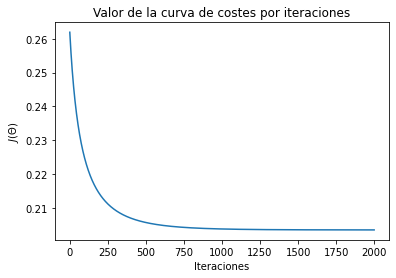

In [64]:
plt.plot(costes) 
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Valor de la curva de costes por iteraciones");

In [65]:
#prueba 2, variación iteraciones
theta, costes = descenso_gradiente(X, y, theta_init, 0.3, 7000)
print("Theta after running gradient descent:", theta) #última theta y coste
print("Resulting cost:", costes[-1])

Theta after running gradient descent: [[1.71844679]
 [3.99278185]
 [3.72513094]]
Resulting cost: 0.20349770159895333


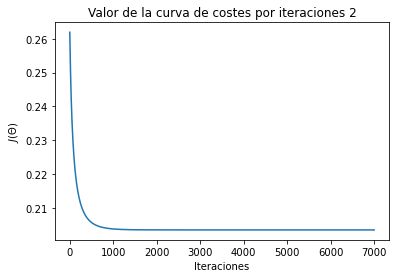

In [67]:
plt.plot(costes) 
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Valor de la curva de costes por iteraciones 2");

In [68]:
#prueba 3, variación alphas
theta, costes = descenso_gradiente(X, y, theta_init, 0.1, 2000)
print("Theta after running gradient descent:", theta) #última theta y coste
print("Resulting cost:", costes[-1])

Theta after running gradient descent: [[1.53251929]
 [3.59763865]
 [3.34290892]]
Resulting cost: 0.2045667147193595


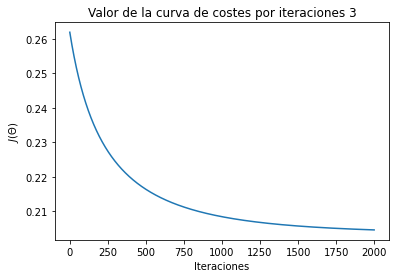

In [69]:
plt.plot(costes) 
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Valor de la curva de costes por iteraciones 3");

## Bibliografía

https://towardsdatascience.com/building-a-logistic-regression-in-python-301d27367c24

https://es.wikipedia.org/wiki/Regresión_log%C3%ADstica

https://carlosjuliopardoblog.wordpress.com/2017/12/31/regresion-logistica/

https://github.com/lmntrixsid/Linear-and-Logistic-Regression-with-NumPy-and-Python/blob/master/Logistic_Regression_Completed.ipynb

https://www.iartificial.net/regresion-logistica-para-clasificacion/

https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f

https://towardsdatascience.com/implement-gradient-descent-in-python-9b93ed7108d1